In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('shakespeares.csv')

In [27]:
data.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [9]:
pd.DataFrame(data['Player'].unique().tolist(), columns=['Player Name'])

,Player Name
0,NaN
1,KING HENRY IV
2,WESTMORELAND
3,FALSTAFF
4,PRINCE HENRY
...,...
930,FLORIZEL
931,PERDITA
932,DORCAS
933,MOPSA


In [8]:
print("Number of plays are: " + str(data['Play'].nunique()))

Number of plays are: 36


In [10]:
#Network Analysis
import networkx as nx

In [11]:
g=nx.Graph()

In [15]:
g=nx.from_pandas_edgelist(data,source='Play',target='Player')

In [16]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 971
Number of edges: 1328
Average degree:   2.7353


In [21]:
import matplotlib.pyplot as plt

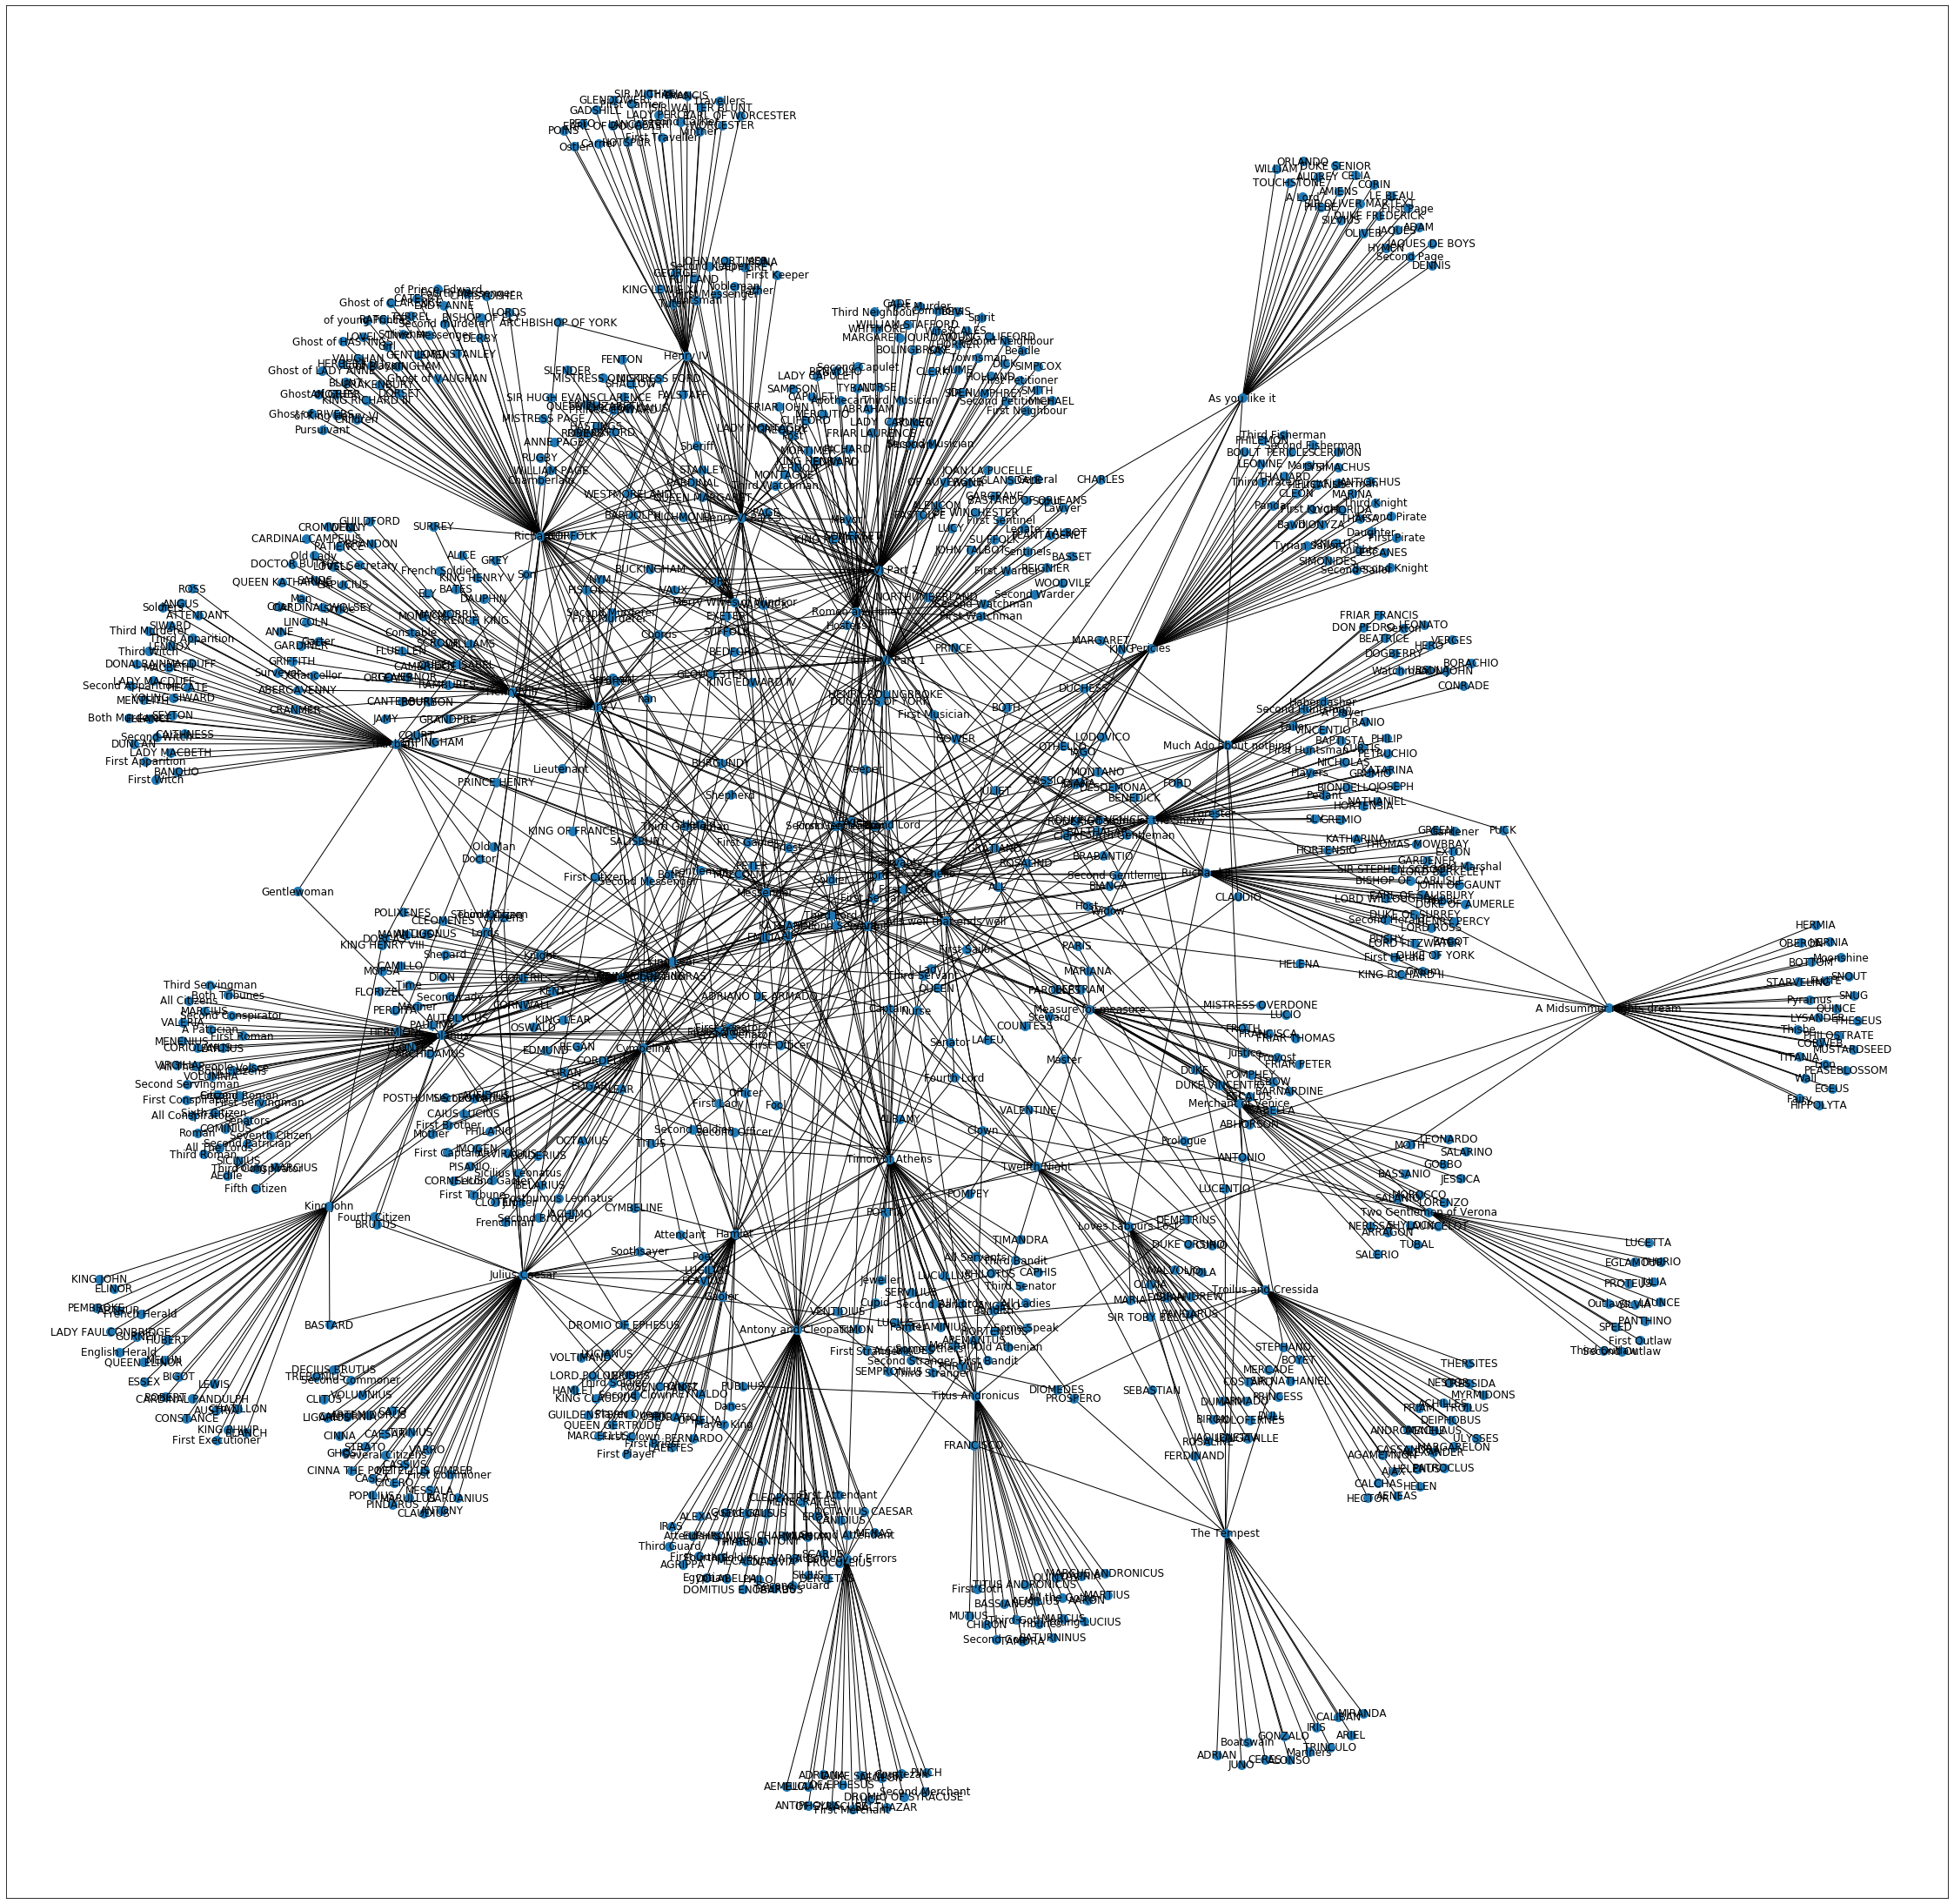

In [20]:
plt.figure(figsize=(40,40)) 
nx.draw_networkx(g,with_labels=True,node_size=100)
plt.show()

In [24]:
#Centrality degree of  players-additional value using network analysis:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Character']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures

,Degree Centrality,Character
0,0.037113,Henry IV
1,0.002062,NaN
2,0.002062,KING HENRY IV
3,0.003093,WESTMORELAND
4,0.002062,FALSTAFF
...,...,...
966,0.001031,FLORIZEL
967,0.001031,PERDITA
968,0.001031,DORCAS
969,0.001031,MOPSA


In [29]:
#Top 10 influential characters(w/ most connections)
star=centralMeasures[centralMeasures['Character'].isin(data['Player'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)
star.head(10)

,Degree Centrality,Character
31,0.022680,Messenger
22,0.020619,Servant
166,0.015464,All
62,0.009278,Captain
72,0.008247,ALL
348,0.008247,Lord
177,0.008247,First Lord
118,0.008247,Second Gentleman
116,0.008247,First Gentleman
238,0.008247,First Servant


In [52]:
#Classfication: using lines and play etc. to find corresponding player
#preparation: convert info of lines into num
data=data.dropna()
asl=data['ActSceneLine'].str.split('.',expand=True)

In [44]:
lines=data['PlayerLine']
#num of letter in the line
letternum=lines.str.len()

#num of word in the line
wordnum = lines.str.split()
wordnum = wordnum.str.len()

In [45]:
#replace player names with label
players=data.Player.unique()
i=0
label = dict()
for player in players:
    label[player]=i
    i=i+1
data_l = data.replace({"Player": label})

In [51]:
#replace play names with label
plays=data.Play.unique()
i=0
playlabel= dict()
for play in plays:
    playlabel[play]=i
    i=i+1
data_ll = data_l.replace({"Play": playlabel})
data_ll.sample(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
111278,111279,35,14.0,5.3.69,918,Do not draw the curtain.
70017,70018,22,128.0,2.1.306,633,There's little of the melancholy element in he...
65721,65722,20,55.0,3.3.132,604,were best meddle with buck-washing.
81611,81612,26,25.0,1.2.96,724,In thy foul throat thou liest: Queen Margaret saw
38935,38936,11,7.0,4.3.12,37,"Farewell, kind lord, fight valiantly to-day:"


In [55]:
new = pd.DataFrame()
new['Player'] = data_ll['Player']
new['Play'] = data_ll['Play']
new['PlayerLineNumber'] = data_ll['PlayerLinenumber']
new['Act'] = asl[0]
new['Scene'] = asl[1]
new['Line'] = asl[2]
new['Num of letters']=letternum
new['Num of words']=wordnum
new.sample(5)

,Player,Play,PlayerLineNumber,Act,Scene,Line,Num of letters,Num of words
62834,577,19,11.0,3,2,93,40,7
35365,355,10,17.0,4,4,49,41,8
74586,650,23,63.0,4,1,158,50,12
59699,564,18,29.0,3,1,104,44,7
61840,581,19,37.0,1,3,147,34,9


In [57]:
#Set regressors and regressand for learning process
from sklearn.model_selection import train_test_split

regressors = new.drop(['Player'], axis=1)
regressand = new['Player']

#split data into training and testing data: 20% for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(regressors, regressand, test_size=0.2) 

In [76]:
#Decision Tree classification
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [77]:
dtree.score(X_test,y_test)

0.8231224290546172

In [78]:
#Random Forest classification
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [80]:
regressor.score(X_test, y_test)

0.8828749073079794

In [81]:
reg2 = RandomForestRegressor(n_estimators=100, random_state=0)
reg2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [82]:
reg2.score(X_test, y_test)

0.8954171716071878